##**Covid 19 Project**
Dataset link: https://drive.google.com/file/d/1TJdxCYLWOIDB4UPzXiLIOAfe1Sibmi6r/view?usp=sharing

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Configurational libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Load Data**

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


**Shape Analysis**

In [ ]:
df.shape

(49068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


We need to convert the Date into datetime type

In [ ]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
df.rename(columns = {'Province/State': 'State','Country/Region': 'Country' },inplace = True)

In [ ]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.Date.value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


**We can see that the max date is 7th July**

In [ ]:
df.Date.max()

'2020-07-27'

In [ ]:
df[df['Date'] == '2020-01-22']

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
256,NaN,Sao Tome and Principe,0.186400,6.613100,2020-01-22,0,0,0,0,Africa
257,NaN,Yemen,15.552727,48.516388,2020-01-22,0,0,0,0,Eastern Mediterranean
258,NaN,Comoros,-11.645500,43.333300,2020-01-22,0,0,0,0,Africa
259,NaN,Tajikistan,38.861000,71.276100,2020-01-22,0,0,0,0,Europe


In [ ]:
top = df[df['Date'] == '2020-07-27']
top.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


**Grouping all rows based on Country**

In [ ]:
top.groupby(by='Country')[['Confirmed',
       'Deaths', 'Recovered', 'Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


**About confirmed cases**

In [ ]:
confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()

In [ ]:
confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
confirmed.tail()

,Date,Confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
df.Date.unique()

array(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
       '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-

Finding the same for death, Active, and Recovered Cases

**Ploting the graph to see how confirmed cases got increase**

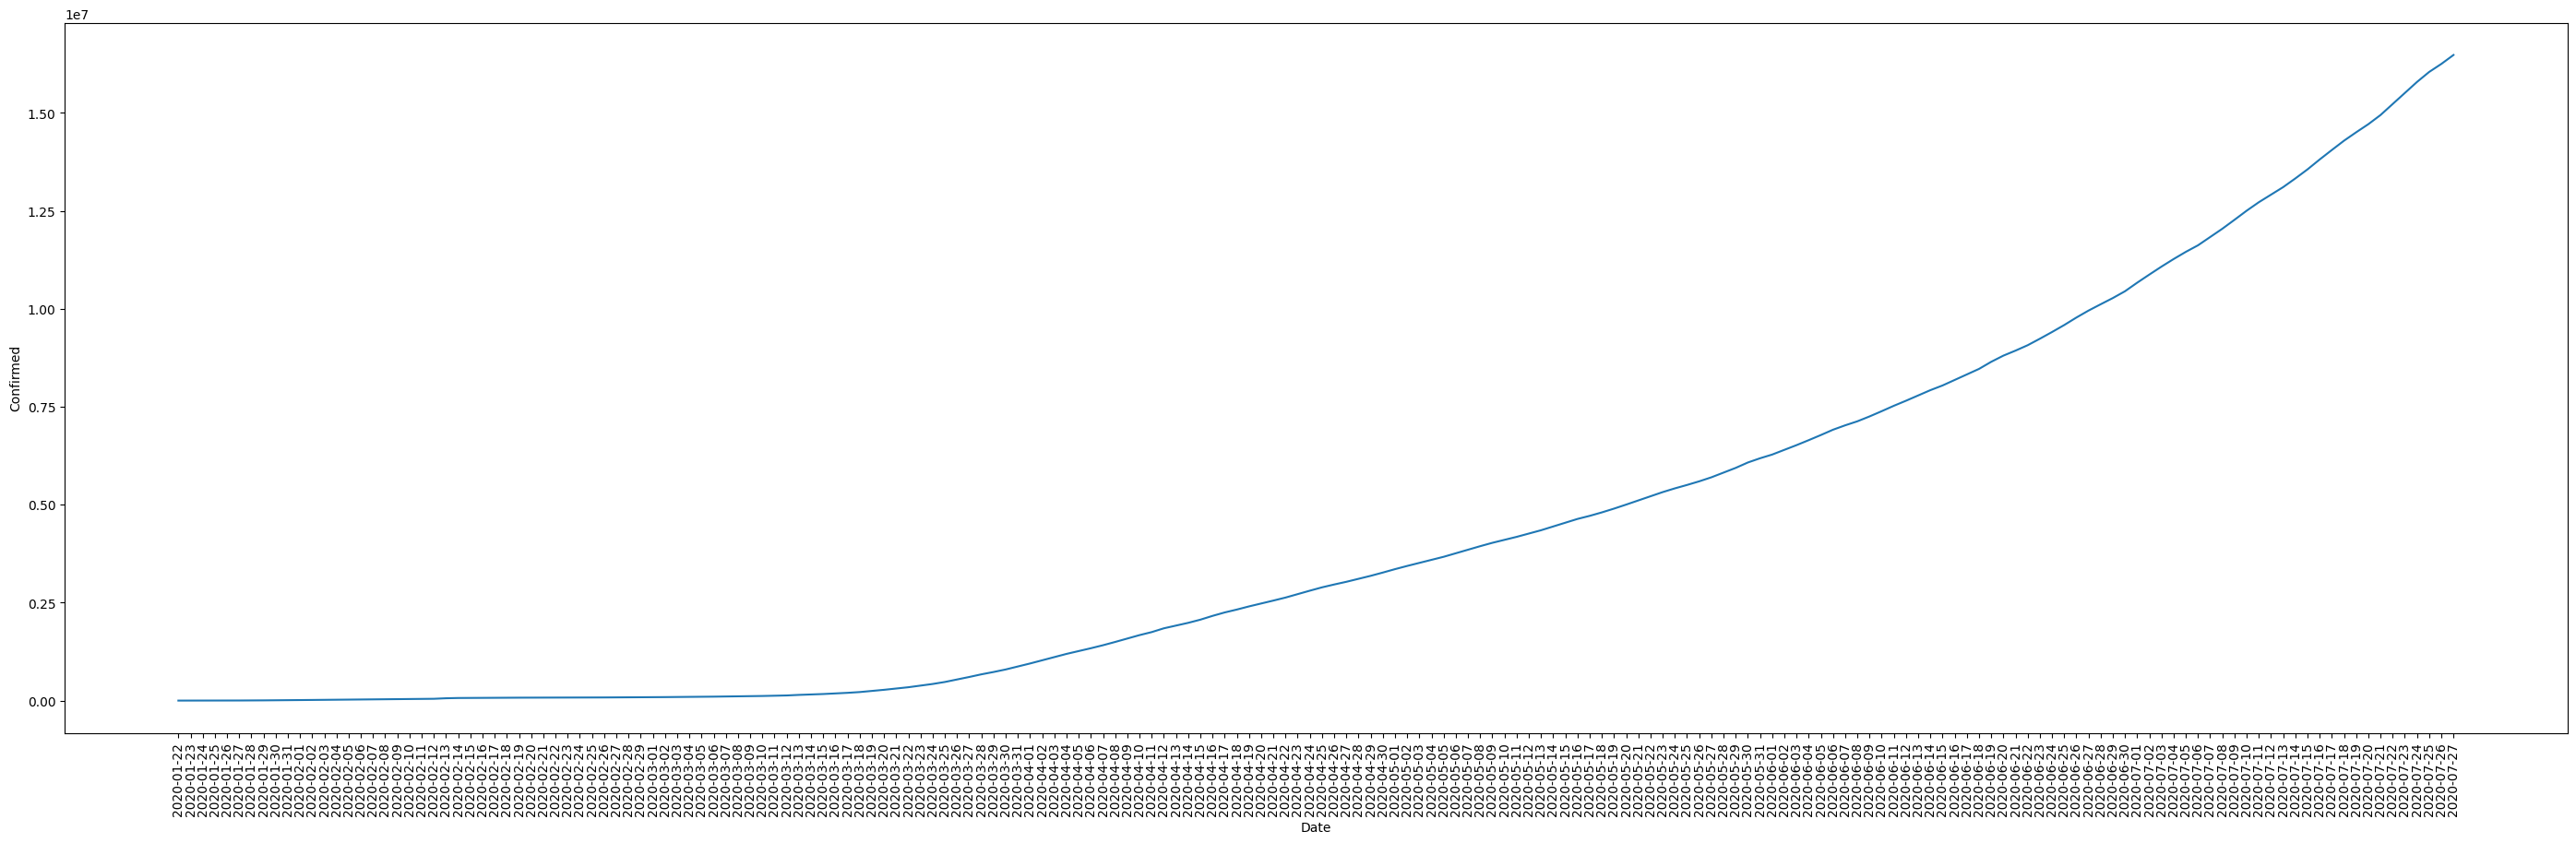

In [ ]:
plt.figure(figsize= (35,10))
sns.lineplot(data=confirmed,x ='Date',y='Confirmed')
plt.xticks(rotation = 90)
plt.show()

**Top 10 countries with the most recovered cases**

In [ ]:
top_10_rec = df.groupby(by='Country')['Recovered'].sum()

In [ ]:
top_10_rec.sort_values(ascending=False,inplace=True)

In [ ]:
top_10_rec.head(10)

,Recovered
Country,
US,56353416
Brazil,54492873
Russia,25120448
India,23783720
Germany,17107839
Italy,15673910
Iran,15200895
Spain,15093583
Turkey,13345389


we finding the same for Death, Confirmed and Active cases too

**Let's do for the active cases**

In [ ]:
top_10_active = df.groupby(by='Country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()

In [ ]:
top_10_active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


**Let's Create the dataset specific for INDIA**

In [ ]:
India = df[df['Country'] == 'India']
India.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


In [ ]:
India.shape

(188, 10)

In [ ]:
India.tail()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia
48936,NaN,India,20.593684,78.96288,2020-07-27,1480073,33408,951166,495499,South-East Asia


**Now.. For US**

In [ ]:
US = df[df['Country'] == 'US']
US.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
US.tail()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
47986,NaN,US,40.0,-100.0,2020-07-23,4038816,144430,1233269,2661117,Americas
48247,NaN,US,40.0,-100.0,2020-07-24,4112531,145560,1261624,2705347,Americas
48508,NaN,US,40.0,-100.0,2020-07-25,4178970,146465,1279414,2753091,Americas
48769,NaN,US,40.0,-100.0,2020-07-26,4233923,146935,1297863,2789125,Americas
49030,NaN,US,40.0,-100.0,2020-07-27,4290259,148011,1325804,2816444,Americas


**Let's Do for CHINA**

In [ ]:
China = df[df['Country'] == 'China']
China.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48,Anhui,China,31.8257,117.2264,2020-01-22,1,0,0,1,Western Pacific
49,Beijing,China,40.1824,116.4142,2020-01-22,14,0,0,14,Western Pacific
50,Chongqing,China,30.0572,107.8740,2020-01-22,6,0,0,6,Western Pacific
51,Fujian,China,26.0789,117.9874,2020-01-22,1,0,0,1,Western Pacific
52,Gansu,China,35.7518,104.2861,2020-01-22,0,0,0,0,Western Pacific


In [ ]:
China.tail()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48883,Tianjin,China,39.3054,117.3230,2020-07-27,204,3,195,6,Western Pacific
48884,Tibet,China,31.6927,88.0924,2020-07-27,1,0,1,0,Western Pacific
48885,Xinjiang,China,41.1129,85.2401,2020-07-27,311,3,73,235,Western Pacific
48886,Yunnan,China,24.9740,101.4870,2020-07-27,190,2,186,2,Western Pacific
48887,Zhejiang,China,29.1832,120.0934,2020-07-27,1270,1,1268,1,Western Pacific


**Here, we are able to see China with very less total confirmend, death, active and recovered** because we have states included**

In [ ]:
China_States = China.groupby(by='State')[['Confirmed',	'Deaths',	'Recovered'	,'Active']].mean()
China_States

,Confirmed,Deaths,Recovered,Active
State,,,,
Anhui,917.537234,5.356383,828.553191,83.627660
Beijing,577.191489,7.356383,445.994681,123.840426
Chongqing,541.255319,5.388298,479.441489,56.425532
Fujian,318.377660,0.845745,281.574468,35.957447
Gansu,126.521277,1.813830,112.569149,12.138298
Guangdong,1425.803191,6.771277,1261.223404,157.808511
Guangxi,236.000000,1.787234,207.058511,27.154255
Guizhou,134.792553,1.781915,120.595745,12.414894
Hainan,157.361702,5.281915,137.925532,14.154255


In [ ]:
China.groupby('Date')[['Confirmed', 'Deaths','Recovered', 'Active']].sum()

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,548,17,28,503
2020-01-23,643,18,30,595
2020-01-24,920,26,36,858
2020-01-25,1406,42,39,1325
2020-01-26,2075,56,49,1970
...,...,...,...,...
2020-07-23,86045,4649,78701,2695
2020-07-24,86202,4650,78745,2807
2020-07-25,86381,4652,78813,2916


**Calculating the cases for 3-4 more countries and then compare the graph of those countries tp check how the cases were changed**

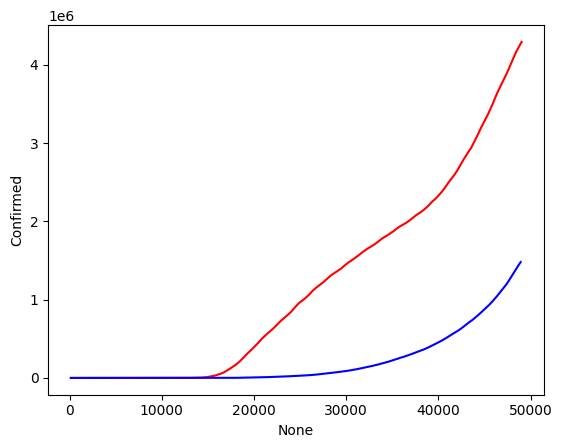

In [ ]:
sns.lineplot(data = US, x =US.index, y=US.Confirmed, color = 'Red')
sns.lineplot(data = India, x =India.index, y=India.Confirmed, color = 'Blue')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
top

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
regionCase = top.groupby('WHO Region')[['Confirmed'	,'Deaths'	,'Recovered'	,'Active']].sum().reset_index()

In [ ]:
regionCase

,WHO Region,Confirmed,Deaths,Recovered,Active
0,Africa,723207,12223,440645,270339
1,Americas,8839286,342732,4468616,4027938
2,Eastern Mediterranean,1490744,38339,1201400,251005
3,Europe,3299523,211144,1993723,1094656
4,South-East Asia,1835297,41349,1156933,637015
5,Western Pacific,292428,8249,206770,77409


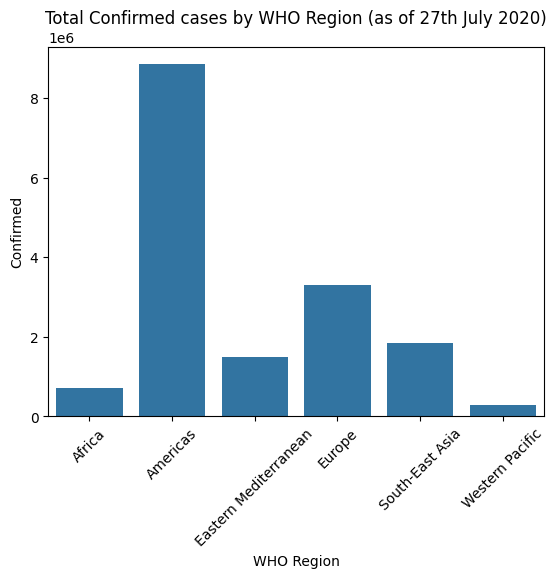

In [ ]:
sns.barplot(data=regionCase, x = 'WHO Region', y='Confirmed')
plt.title('Total Confirmed cases by WHO Region (as of 27th July 2020)')
plt.xticks(rotation = 45)
plt.show()

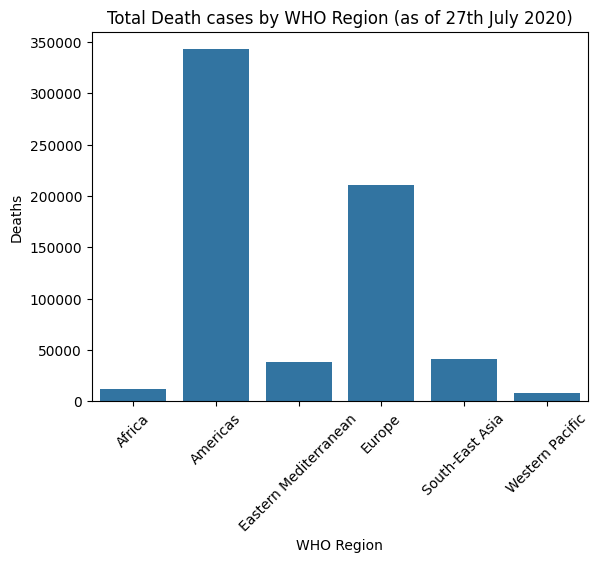

In [ ]:
sns.barplot(data=regionCase, x = 'WHO Region', y='Deaths')
plt.title('Total Death cases by WHO Region (as of 27th July 2020)')
plt.xticks(rotation = 45)
plt.show()

**Finding Mortalitiy and Recovery Rate**

In [ ]:
WorldLatest = top.groupby('Country')[['Confirmed'	,'Deaths'	,'Recovered']].sum().reset_index()

In [ ]:
WorldLatest['Mortality Rate'] = (WorldLatest['Deaths']) / (WorldLatest['Confirmed']) * 100
WorldLatest

,Country,Confirmed,Deaths,Recovered,Mortality Rate
0,Afghanistan,36263,1269,25198,3.499435
1,Albania,4880,144,2745,2.950820
2,Algeria,27973,1163,18837,4.157581
3,Andorra,907,52,803,5.733186
4,Angola,950,41,242,4.315789
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,0.734394
183,Western Sahara,10,1,8,10.000000
184,Yemen,1691,483,833,28.562980
185,Zambia,4552,140,2815,3.075571


In [ ]:
WorldLatest['Recovery Rate'] = (WorldLatest['Recovered']) / (WorldLatest['Confirmed']) * 100
WorldLatest

,Country,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
0,Afghanistan,36263,1269,25198,3.499435,69.486805
1,Albania,4880,144,2745,2.950820,56.250000
2,Algeria,27973,1163,18837,4.157581,67.339935
3,Andorra,907,52,803,5.733186,88.533627
4,Angola,950,41,242,4.315789,25.473684
...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,0.734394,35.326240
183,Western Sahara,10,1,8,10.000000,80.000000
184,Yemen,1691,483,833,28.562980,49.260792
185,Zambia,4552,140,2815,3.075571,61.840949


**Let's Sort values for Mortality and Recovery Rate in Descending order**

In [ ]:
WorldLatest.sort_values(by='Mortality Rate', ascending=False).head(10)

,Country,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
184,Yemen,1691,483,833,28.562980,49.260792
177,United Kingdom,301708,45844,1437,15.194824,0.476288
16,Belgium,66428,9822,17452,14.785934,26.272054
85,Italy,246286,35112,198593,14.256596,80.635115
61,France,220352,30212,81212,13.710790,36.855577
77,Hungary,4448,596,3329,13.399281,74.842626
120,Netherlands,53413,6160,189,11.532773,0.353846
111,Mexico,395489,44022,303810,11.131030,76.818824
157,Spain,272421,28432,150376,10.436787,55.199856
183,Western Sahara,10,1,8,10.000000,80.000000


In [ ]:
WorldLatest.sort_values(by='Recovery Rate',ascending=False).head(10)

,Country,Confirmed,Deaths,Recovered,Mortality Rate,Recovery Rate
49,Dominica,18,0,18,0.000000,100.000000
75,Holy See,12,0,12,0.000000,100.000000
69,Grenada,23,0,23,0.000000,100.000000
48,Djibouti,5059,58,4977,1.146472,98.379126
78,Iceland,1854,10,1823,0.539374,98.327940
24,Brunei,141,3,138,2.127660,97.872340
121,New Zealand,1557,22,1514,1.412974,97.238279
136,Qatar,109597,165,106328,0.150552,97.017254
105,Malaysia,8904,124,8601,1.392633,96.597035
110,Mauritius,344,10,332,2.906977,96.511628


##**Model Building**
* We will be using Meta Prophet model for performing time series forecasting
* it is developed by Facebook back in 2017 (now Meta)

In [ ]:
!pip install prophet

**I am forecasting for Confirmed Cases**

###**Forecast**
Make sure to rename the date column as 'ds' and the target column as 'y'

In [ ]:
confirmed.columns = ['ds','y']
confirmed.head(10)

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
5,2020-01-27,2927
6,2020-01-28,5578
7,2020-01-29,6166
8,2020-01-30,8234
9,2020-01-31,9927


In [ ]:
from prophet import Prophet
m = Prophet()

**Now we will fit our data (both Data as well as Target)**
* Prophet model will give us future dataFrame upto certain time period

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt6wikztc/ohvble_6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt6wikztc/8997nnkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93218', 'data', 'file=/tmp/tmpt6wikztc/ohvble_6.json', 'init=/tmp/tmpt6wikztc/8997nnkq.json', 'output', 'file=/tmp/tmpt6wikztc/prophet_modelfxjm3ujt/prophet_model-20251024164104.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:41:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:41:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Making prediction for next 7 Days**

In [ ]:
# Keyword for method -> make_future_dataframe() ---> Give the forecasted value
future = m.make_future_dataframe(periods = 7)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.265063e+05,8.669168e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.065336e+05,9.708873e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.001548e+05,1.093191e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.536508e+04,1.202835e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.079414e+05,1.078077e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663319e+07,1.684489e+07,1.673902e+07,1.674958e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.685578e+07,1.706093e+07,1.693785e+07,1.695850e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705609e+07,1.728167e+07,1.713100e+07,1.716922e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724818e+07,1.746891e+07,1.732442e+07,1.738301e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds','yhat','yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-2.067684e+04,-1.265063e+05,8.669168e+04
1,2020-01-23,-8.050948e+03,-1.065336e+05,9.708873e+04
2,2020-01-24,5.827455e+03,-1.001548e+05,1.093191e+05
3,2020-01-25,1.217668e+04,-9.536508e+04,1.202835e+05
4,2020-01-26,8.405020e+03,-1.079414e+05,1.078077e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.663319e+07,1.684489e+07
191,2020-07-31,1.695910e+07,1.685578e+07,1.706093e+07
192,2020-08-01,1.716676e+07,1.705609e+07,1.728167e+07
193,2020-08-02,1.736430e+07,1.724818e+07,1.746891e+07


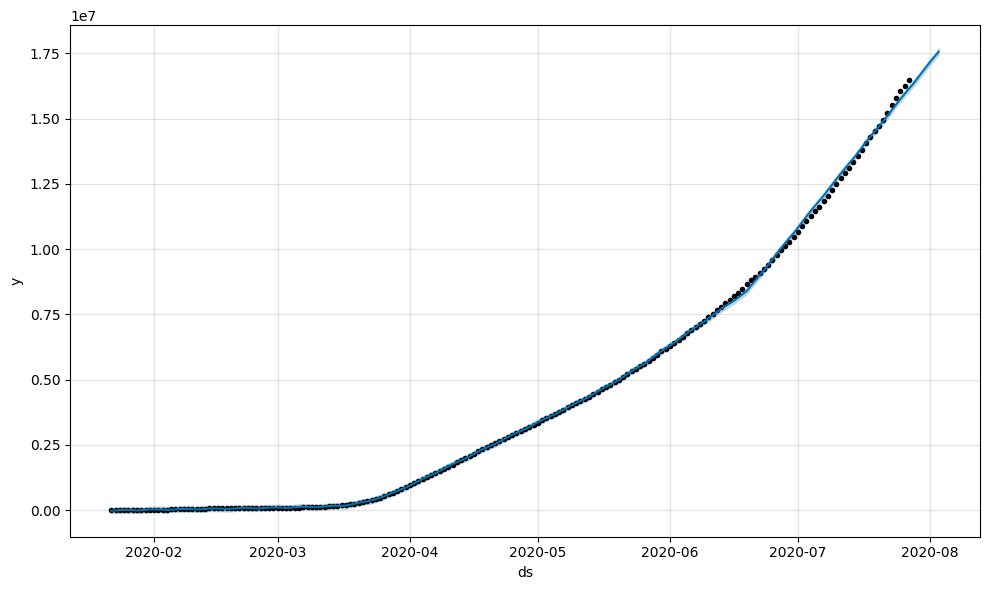

In [ ]:
m.plot(forecast)
plt.show()

**Choropleth graph**

In [ ]:
import plotly.express as px

In [ ]:
top.columns

Index(['State', 'Country', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
world = top.groupby(by='Country')[['Confirmed', 'Deaths',
       'Recovered', 'Active']].sum().reset_index()

In [ ]:
world

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
fig = px.choropleth(world,locations='Country',locationmode='country names',color='Deaths'
                        , hover_name='Country',color_continuous_scale='blues',
                    title='Countries with Death Cases')
fig.show()